In [ ]:
# !pip install -q -U "unstructured[all-docs]" python-dotenv

In [1]:
import os
import dotenv

dotenv.load_dotenv('.env')

True

## Set up connection to Unstructured Serverless API

In [2]:
from unstructured_client import UnstructuredClient

client = UnstructuredClient(
    api_key_auth=os.getenv("UNSTRUCTURED_API_KEY"),
    server_url=os.getenv("UNSTRUCTURED_URL"),
)

## Partition a markdown file 

In [18]:
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

filename = "documents/markdown/index.md"

with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files
)

try:
    resp = client.general.partition(req)
    md_elements = resp.elements
except SDKError as e:
    print(e)
    md_elements = []

INFO: Preparing to split document for partition.
INFO: Given file doesn't have '.pdf' extension, so splitting is not enabled.
INFO: Partitioning without split.
INFO: Successfully partitioned the document.


In [20]:
md_elements

[{'type': 'Title',
  'element_id': 'f29be37b00ac97c16b36e93d3fd79b16',
  'text': 'import DocCardList from "@theme/DocCardList";',
  'metadata': {'category_depth': 0,
   'languages': ['eng'],
   'filename': 'index.md',
   'filetype': 'text/markdown'}},
 {'type': 'Title',
  'element_id': '77fc863e16eb844e44919d345b73d264',
  'text': 'Evaluation',
  'metadata': {'category_depth': 0,
   'languages': ['eng'],
   'filename': 'index.md',
   'filetype': 'text/markdown'}},
 {'type': 'NarrativeText',
  'element_id': '5e4aafa4bd3e2cfda08bd87758cafc6f',
  'text': "Building applications with language models involves many moving parts. One of the most critical components is ensuring that the outcomes produced by your models are reliable and useful across a broad array of inputs, and that they work well with your application's other software components. Ensuring reliability usually boils down to some combination of application design, testing & evaluation, and runtime checks.",
  'metadata': {'langua

In [19]:
from collections import Counter

element_types = [e['type'] for e in md_elements]
Counter(element_types).keys()

dict_keys(['Title', 'NarrativeText', 'ListItem'])

## Preprocess an image-based document

In [46]:
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

filename = "documents/pdfs/2004.11252v1.pdf"

with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy=shared.Strategy.HI_RES,
    extract_image_block_types=["image"],
)

try:
    resp = client.general.partition(req)
    pdf_elements = resp.elements
except SDKError as e:
    print(e)
    pdf_elements = []

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Concurrency level set to 5
INFO: Determined optimal split size of 2 pages.
INFO: Document split into 5, 2-paged sets.
INFO: Partitioning 5, 2-paged sets.
INFO: Partitioning set #1 (pages 1-3).
INFO: Partitioning set #2 (pages 3-5).
INFO: Partitioning set #3 (pages 5-7).
INFO: Partitioning set #4 (pages 7-9).
INFO: Partitioning set #5 (pages 9-10).
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: Successfully partitioned set #1, elements added to the final result.
INFO: Successfully partitioned set #2, elements added to the final result.
INFO: Successfully partitioned set #3

In [73]:
pdf_elements

[{'type': 'Title',
  'element_id': 'ba95b50e88285e1e8fbc554087c2fb87',
  'text': 'Weakly Supervised Learning Guided by Activation Mapping Applied to a Novel Citrus Pest Benchmark',
  'metadata': {'filetype': 'application/pdf',
   'languages': ['eng'],
   'page_number': 1,
   'filename': '2004.11252v1.pdf'}},
 {'type': 'UncategorizedText',
  'element_id': 'f74bbe4bf45e5fc36746c1b492dc0737',
  'text': '0 2 0 2',
  'metadata': {'filetype': 'application/pdf',
   'languages': ['eng'],
   'page_number': 1,
   'parent_id': 'ba95b50e88285e1e8fbc554087c2fb87',
   'filename': '2004.11252v1.pdf'}},
 {'type': 'NarrativeText',
  'element_id': '9be2377f193874975f3bc6745e4409cc',
  'text': 'r p A 2 2',
  'metadata': {'filetype': 'application/pdf',
   'languages': ['eng'],
   'page_number': 1,
   'parent_id': 'ba95b50e88285e1e8fbc554087c2fb87',
   'filename': '2004.11252v1.pdf'}},
 {'type': 'UncategorizedText',
  'element_id': '8fede7a8f42c6dd14b78dc740f18b0bc',
  'text': ']',
  'metadata': {'filetype

In [48]:
from collections import Counter

element_types = [e['type'] for e in pdf_elements]
Counter(element_types).keys()

dict_keys(['Title', 'UncategorizedText', 'NarrativeText', 'Image', 'Table', 'CodeSnippet', 'Formula'])

In [34]:
table_elements = [e for e in pdf_elements if e['type'] == "Table"]

In [49]:
table_elements[0]

{'type': 'Table',
 'element_id': '2c13e13a8380046809ab426181674416',
 'text': 'Author Database Name Size Type Year Hughes and Salath´e [12] Barbedo et al. [2] Nachtigall et al. [25] Tan et al. [37] Liu et al. [19] Bhandari et al. [3] Liu et al. [18] Alfarisy et al. [1] Lee and Xing [15] Wu et al. [41] Li et al. [17] Chen et al. [5] Our work PlantVillage N/A N/A N/A Pests ID N/A N/A Paddy Pest Image Pest Tangerine IP102 Aphid Images N/A CPB 55,000 1,335 2,539 4,000 5.136 N/A 13.689 4,511 5,247 75,222 2,200 700 10,816 symptoms of diseases symptoms of diseases symptoms of diseases symptoms of diseases pests symptoms of diseases symptoms of diseases pests pests pests pests pests pests 2015 2016 2016 2016 2016 2017 2018 2018 2018 2019 2019 2020 2020',
 'metadata': {'text_as_html': '<table><thead><tr><th>Author</th><th>Database Name</th><th>Size</th><th>Type</th><th>Year</th></tr></thead><tbody><tr><td>Hughes and Salathé [12]</td><td>PlantVillage</td><td>55,000</td><td>symptoms of diseases</

In [72]:
from IPython.display import HTML

HTML(table_elements[0]['metadata']['text_as_html'])

Author,Database Name,Size,Type,Year
Hughes and Salathé [12],PlantVillage,"55,000",symptoms of diseases,2015
Barbedo et al. [2],,"1,335",symptoms of diseases,2016
Nachtigall et al. [25],,"2,539",symptoms of diseases,2016
Tan et al. [37],,"4,000",symptoms of diseases,2016
Liuetal. [19],Pests ID,5.136,pests,2016
Bhandari et al. [3],,,symptoms of diseases,2017
Liuetal. [18],,13.689,symptoms of diseases,2018
Alfarisy et al. [1],Paddy Pest Image,"4,511",pests,2018
Lee and Xing [15],Pest Tangerine,"5,247",pests,2018
Wuetal. [41],1P102,"75,222",pests,2019


In [51]:
image_elements = [e for e in pdf_elements if e['type'] == "Image"]

In [68]:
image_elements[0]

{'type': 'Image',
 'element_id': '388a41f7ee54df9259944aa87cf76411',
 'text': '',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 3,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADcATADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+P

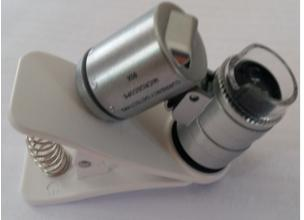

In [69]:
from IPython import display
from base64 import b64decode

display.Image(b64decode(image_elements[0]['metadata']['image_base64']))

In [67]:
image_elements[12]

{'type': 'Image',
 'element_id': 'afe15eda15fd96aa5a21cfa9a84f82c0',
 'text': 'Step 1 Step 2 Step 3 Step 4 e e = e e - ———— Weighted Saliency Map| Evaluation 1200x1200 i Method E 400x400 Patch Algorithm E =" .: | ‘b, L] = I s m —_— —> Class AN CNN: Bag Model CNN: Instance Model — Data Flow ; — —> Object Reuse — —> Steps —> Patches',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 5,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHGBXUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECA

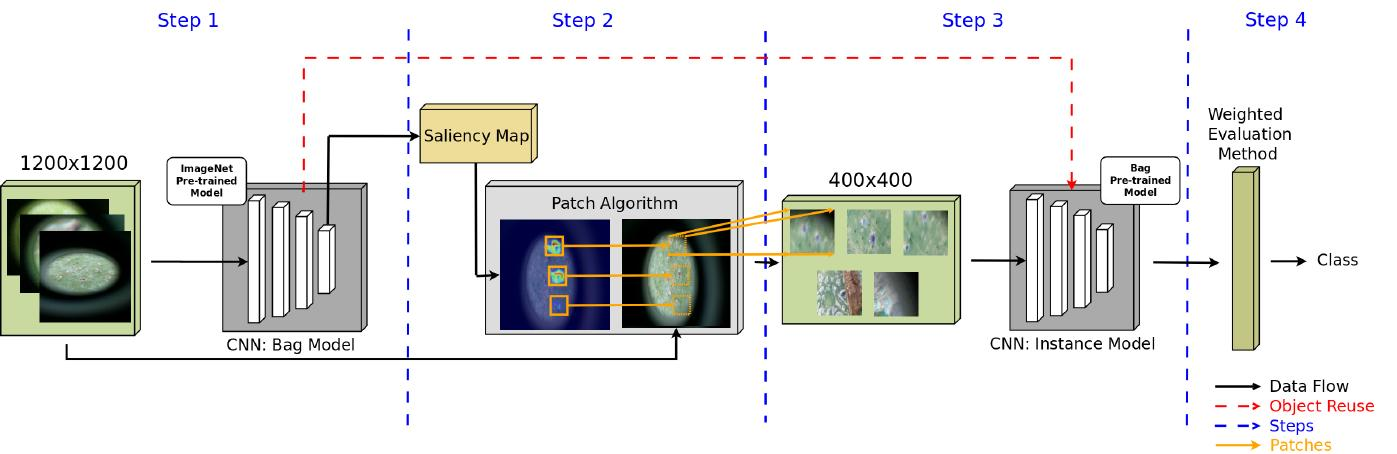

In [70]:
from IPython import display
from base64 import b64decode

display.Image(b64decode(image_elements[12]['metadata']['image_base64']))